In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df_train = pd.read_csv('/home/alvaro/tf_templates/DATA/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
df_test = pd.read_csv('/home/alvaro/tf_templates/DATA/DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)

In [5]:
df_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
01/01/2013,10.000000,84.500000,0.000000,1015.666667
02/01/2013,7.400000,92.000000,2.980000,1017.800000
03/01/2013,7.166667,87.000000,4.633333,1018.666667
04/01/2013,8.666667,71.333333,1.233333,1017.166667
05/01/2013,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
27/12/2016,16.850000,67.550000,8.335000,1017.200000
28/12/2016,17.217391,68.043478,3.547826,1015.565217
29/12/2016,15.238095,87.857143,6.000000,1016.904762


In [6]:
df_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,1012.739316
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [7]:
train = df_train[['meantemp']]
test = df_test[['meantemp']]

In [8]:
train.head()

,meantemp
date,
01/01/2013,10.000000
02/01/2013,7.400000
03/01/2013,7.166667
04/01/2013,8.666667
05/01/2013,6.000000


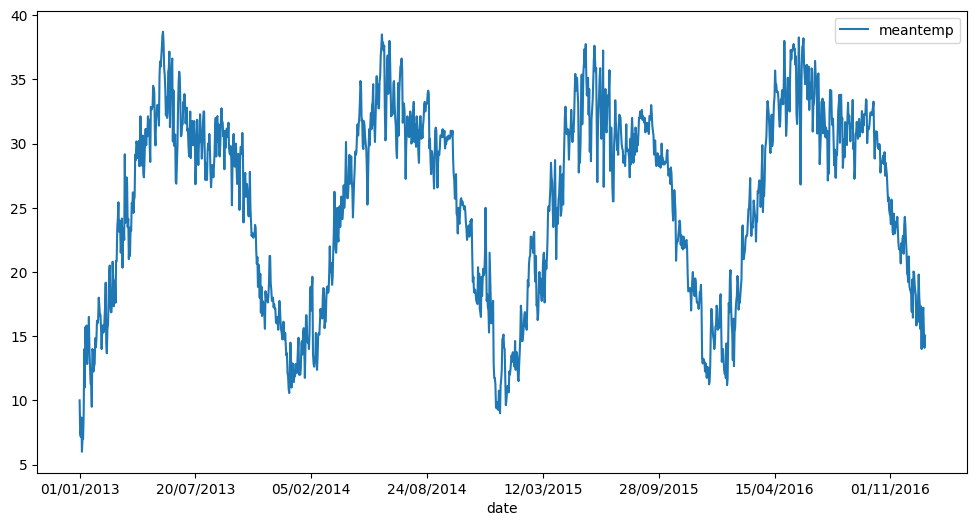

In [9]:
train.plot(figsize=(12, 6));

In [10]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [11]:
length = 90
batch_size = 32
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [12]:
n_features = 1

In [22]:
model = Sequential([
    Input(shape=(length, n_features)),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=50, activation='relu'),
    Dense(units=n_features)
])

In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [24]:
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)

In [25]:
model.fit(generator, epochs=100, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1365 - mae: 0.2894 - val_loss: 0.0152 - val_mae: 0.1098
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mae: 0.0957 - val_loss: 0.0127 - val_mae: 0.0999
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mae: 0.0810 - val_loss: 0.0112 - val_mae: 0.0944
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mae: 0.0804 - val_loss: 0.0102 - val_mae: 0.0900
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mae: 0.0821 - val_loss: 0.0098 - val_mae: 0.0884
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - mae: 0.0734 - val_loss: 0.0085 - val_mae: 0.0814
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0075 - mae: 0.0686 - val_loss: 0.0072 - val_mae: 0.0729
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mae: 0.0824 - val_loss: 0.0137 - val_mae: 0.1046
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

In [26]:
history = pd.DataFrame(model.history.history)

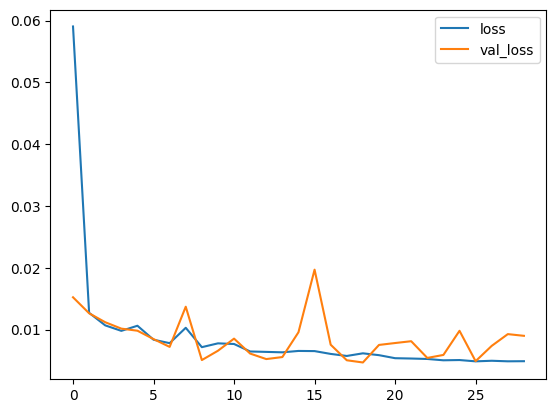

In [27]:
history[['loss', 'val_loss']].plot();

In [28]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(scaled_test)):
    current_prediction = model.predict(current_batch, verbose=0)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

In [29]:
predictions = scaler.inverse_transform(test_predictions)
test.loc[:, 'Predictions'] = predictions

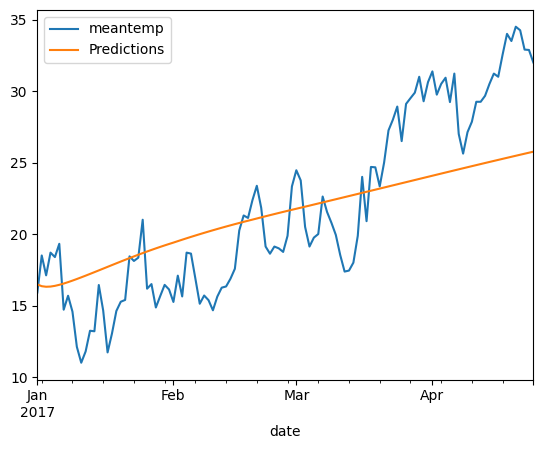

In [30]:
test.plot();